In [1]:
using SparseArrays
using LinearAlgebra
using DIVAnd
using PyPlot
using Statistics

ND=100
NX=500

len=0.1
# obs. error variance normalized by the background error variance
epsilon2 = 1.0

fun(x) = 2*sin.(10 .*x)  .+ (0 .- 1) .* x 
x = 0.5.+0.25.*randn(ND);
f = fun.(x)+0.1*randn(ND)
# final grid
xi= collect(range(0,stop=1,length=NX));

@show size(xi)

# all points are valid points
mask = trues(size(xi));

fi = fun.(xi)

pm = ones(size(xi)) / (xi[2]-xi[1]);

Ntest=100
ee1=zeros(Float64,Ntest)
ee2=zeros(Float64,Ntest)
ee3=zeros(Float64,Ntest)
epsval=zeros(Float64,Ntest)

size(xi) = (500,)


100-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [2]:
?DIVAnd_norms

search: DIVAnd_norms DIVAnd_pc_none DIVAnd_datainboundingbox



```
norm1,norm2,norm3,epsilon2=DIVAnd_norms(fi,s)
```

### Input:

  * `fi` and `s` from the corresponding `DIVANDrun` exectution  `fi,s = DIVAndrun(...`

### Output:

the different terms of the norm which is minimised

  * `norm1`: the regularity terms
  * `norm2`: the data-misfit terms
  * `norm3`: the remaining constraints
  * `epsilon2` : the average diagonal of `R`; that allows to look at the L-shape curve by looking at `Log(norm1)` vs `Log(norm2*epsilon2)`


https://www.sintef.no/globalassets/project/evitameeting/2005/lcurve.pdf

In [3]:
for jjj=1:Ntest
epsilon2=10^(-8.0+jjj/Ntest*10)
fi,s=DIVAndrun(mask,(pm,),(xi,),(x,),f,(len,),epsilon2)

#pcolor(xi[:,10,:],zi[:,10,:],fi[:,10,:],shading="nearest"),colorbar()

myz=2
#pcolor(xi[:,:,myz],yi[:,:,myz],fi[:,:,myz],shading="nearest"),colorbar()

ee1[jjj],ee2[jjj],ee3[jjj],epsval[jjj]=DIVAnd_norms(fi,s) 
end

(log10.(ee2[mychoice] .* epsval[mychoice]), log10.(ee1[mychoice]), epsval[mychoice]) = (-0.01123465168890117, 1.3493297596308174, 0.1)


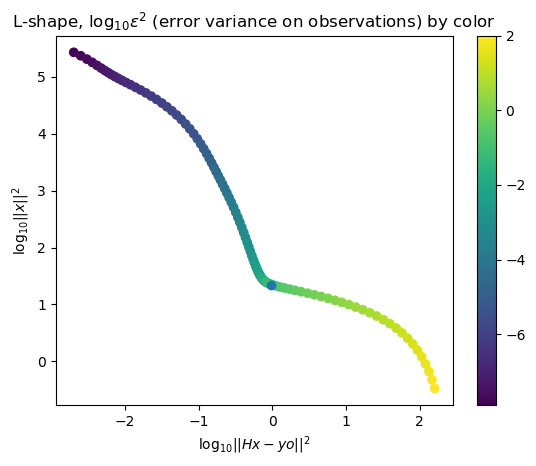

In [4]:
mychoice=70
@show log10.(ee2[mychoice].*(epsval[mychoice])),log10.(ee1[mychoice]),epsval[mychoice]
figure()
scatter(log10.(ee2.*(epsval)),log10.(ee1),c=log10.(epsval)),colorbar()
scatter(log10.(ee2[mychoice].*(epsval[mychoice])),log10.(ee1[mychoice]))
xlabel("\$\\log_{10} ||H x -yo||^2\$")
ylabel("\$\\log_{10} ||x||^2\$")
title("L-shape, \$ \\log_{10} \\epsilon^2 \$ (error variance on observations) by color")
savefig("Lshape1D.png")

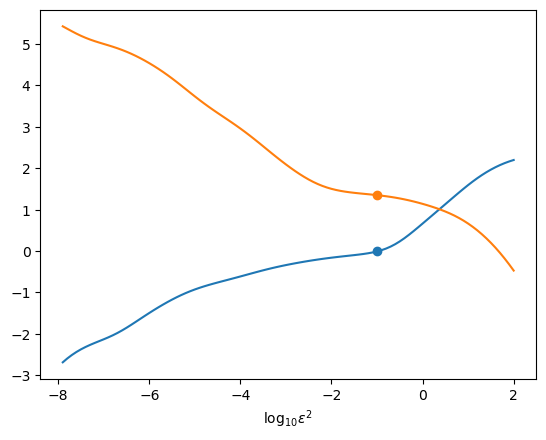

PyObject Text(0.5, 31.6, '$\\log_{10} \\epsilon^2$')

In [5]:
plot(log10.(epsval),log10.(ee2.*(epsval)),log10.(epsval),log10.(ee1))
scatter(log10.(epsval[mychoice]),log10.(ee2[mychoice].*(epsval[mychoice])))
scatter(log10.(epsval[mychoice]),log10.(ee1[mychoice]))
xlabel("\$\\log_{10} \\epsilon^2\$")


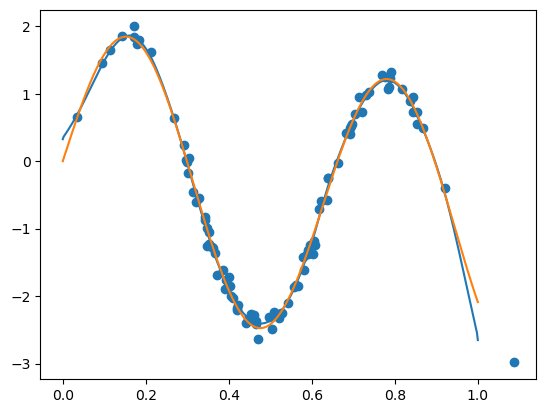

PyObject <matplotlib.collections.PathCollection object at 0x0000019DD61638E0>

In [6]:
epsilon2=epsval[mychoice]
fi,s=DIVAndrun(mask,(pm,),(xi,),(x,),f,(len,),epsilon2)

plot(xi,fi,xi,fun.(xi))
scatter(x,f)